In [1]:
                                                            # CLUSTERING ANALYSIS 

In [2]:
# Datasets :

In [3]:
# Data Preprocessing:

In [4]:
# 1. Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [5]:
import pandas as pd
df = pd.read_csv("EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [32]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [33]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [34]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [35]:
print("outliers:", outliers)

outliers: Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df[df.columns]))

In [38]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [39]:
# 2. Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

In [27]:
df.shape

(3999, 12)

In [28]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [31]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [40]:
df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


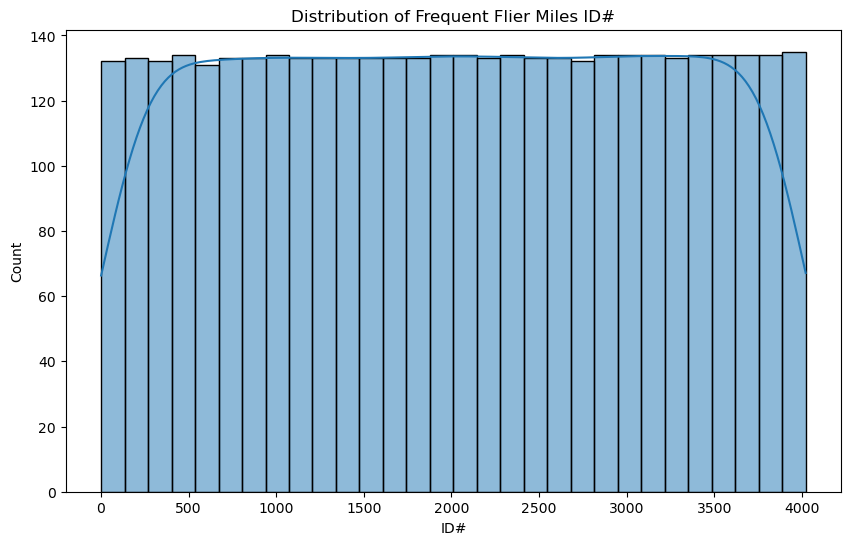

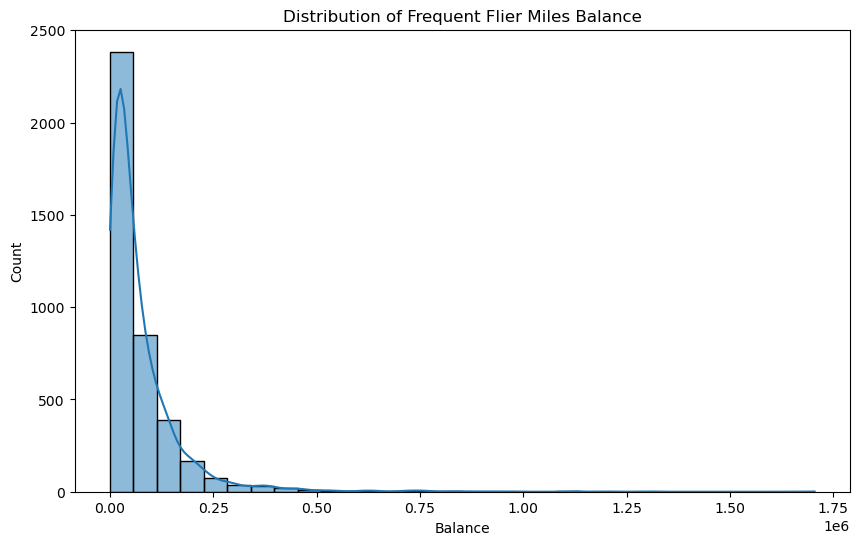

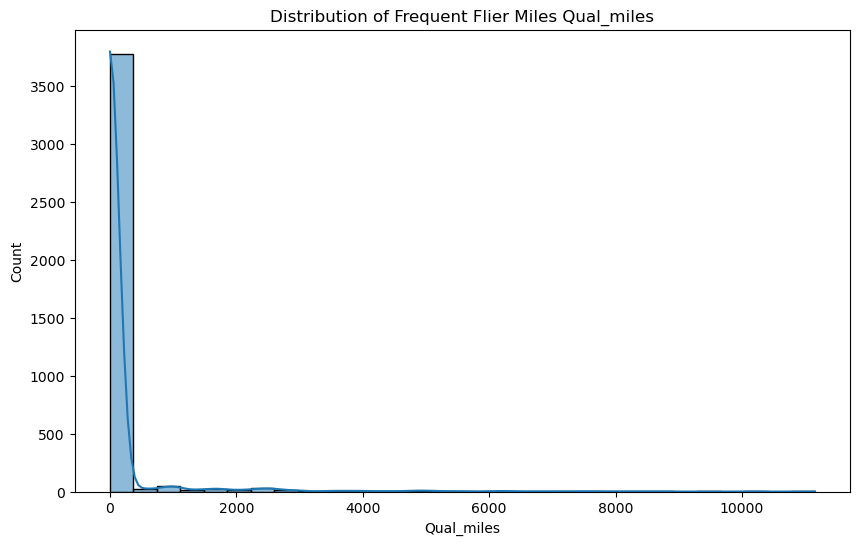

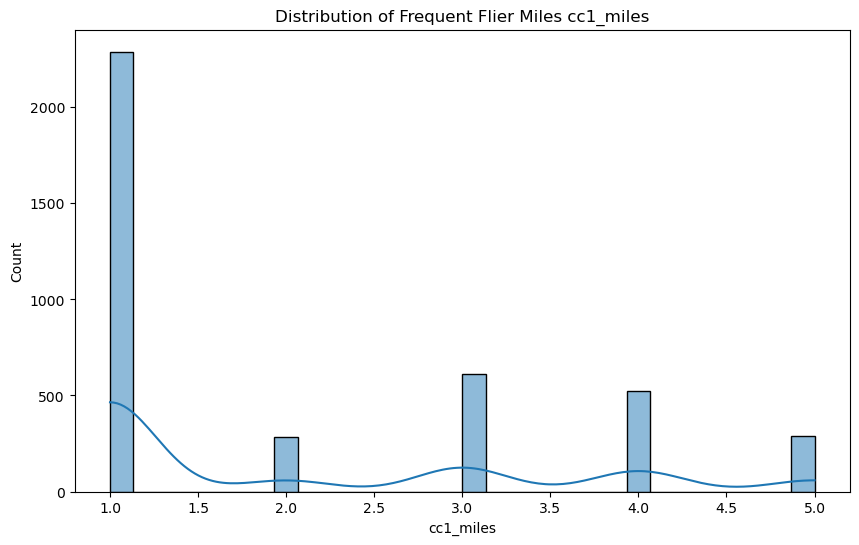

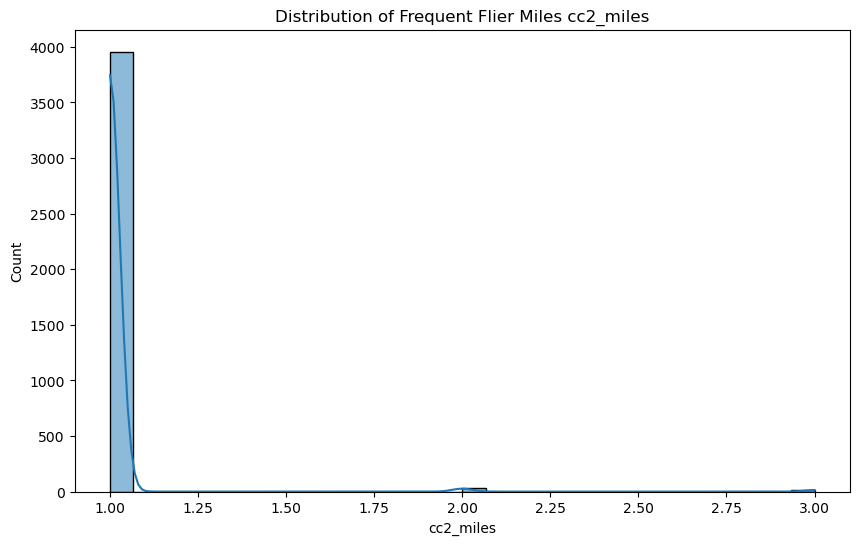

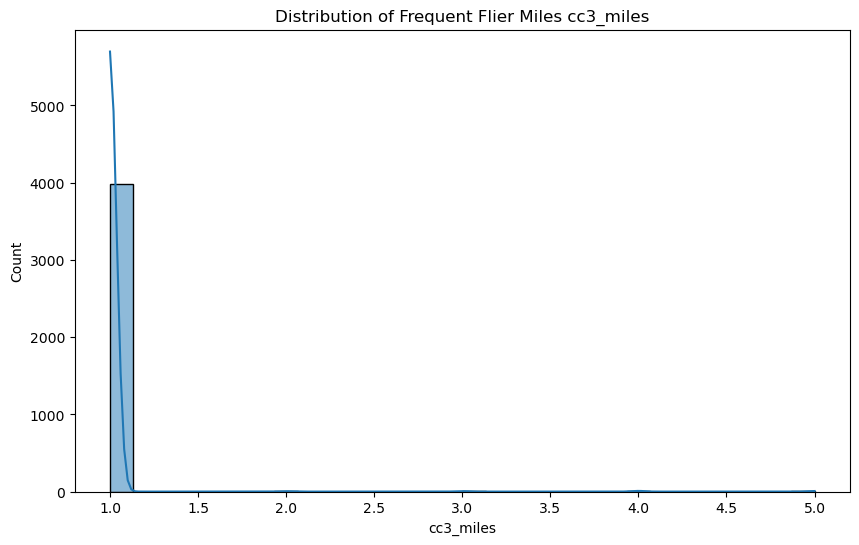

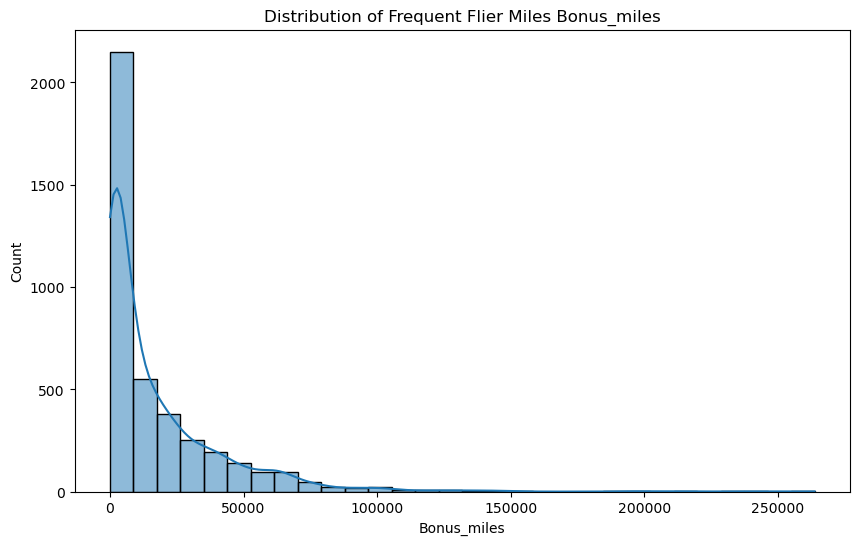

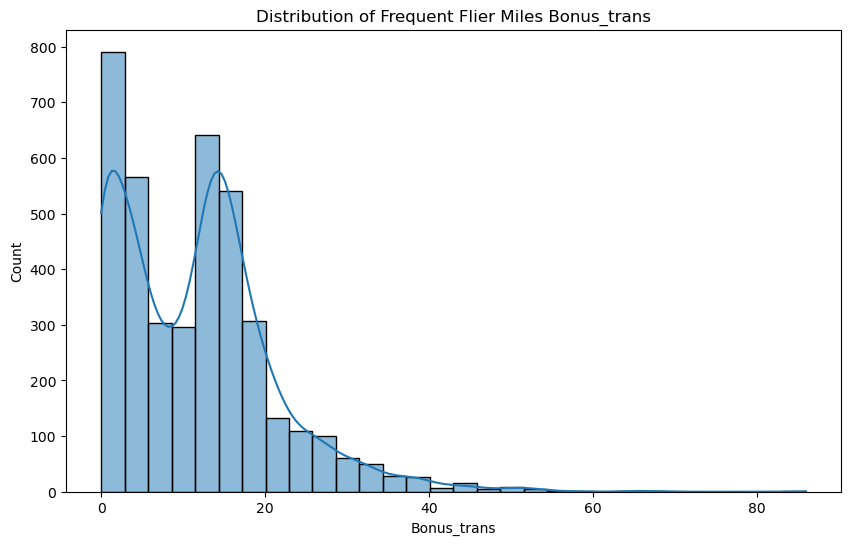

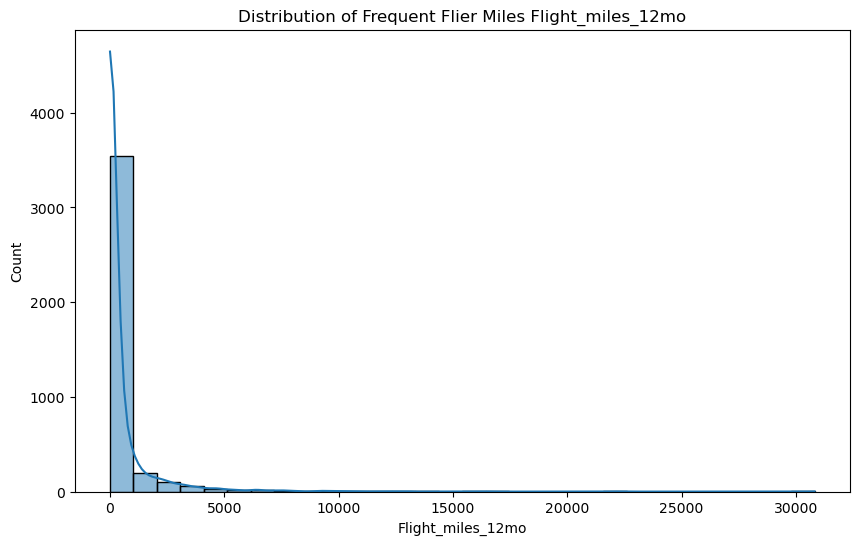

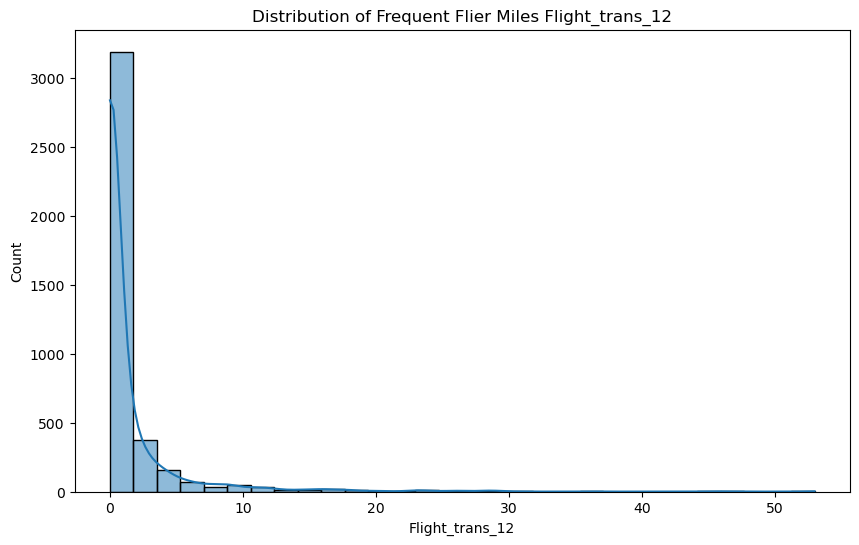

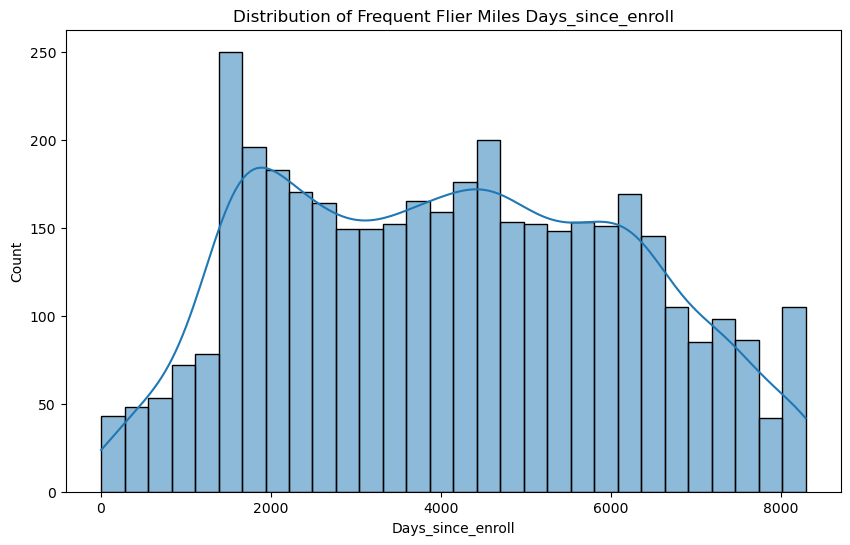

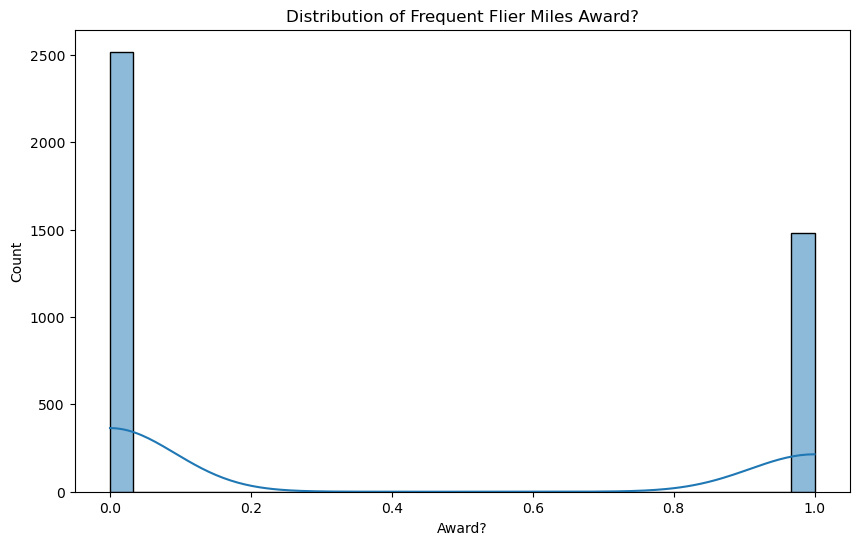

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of Frequent Flier Miles {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

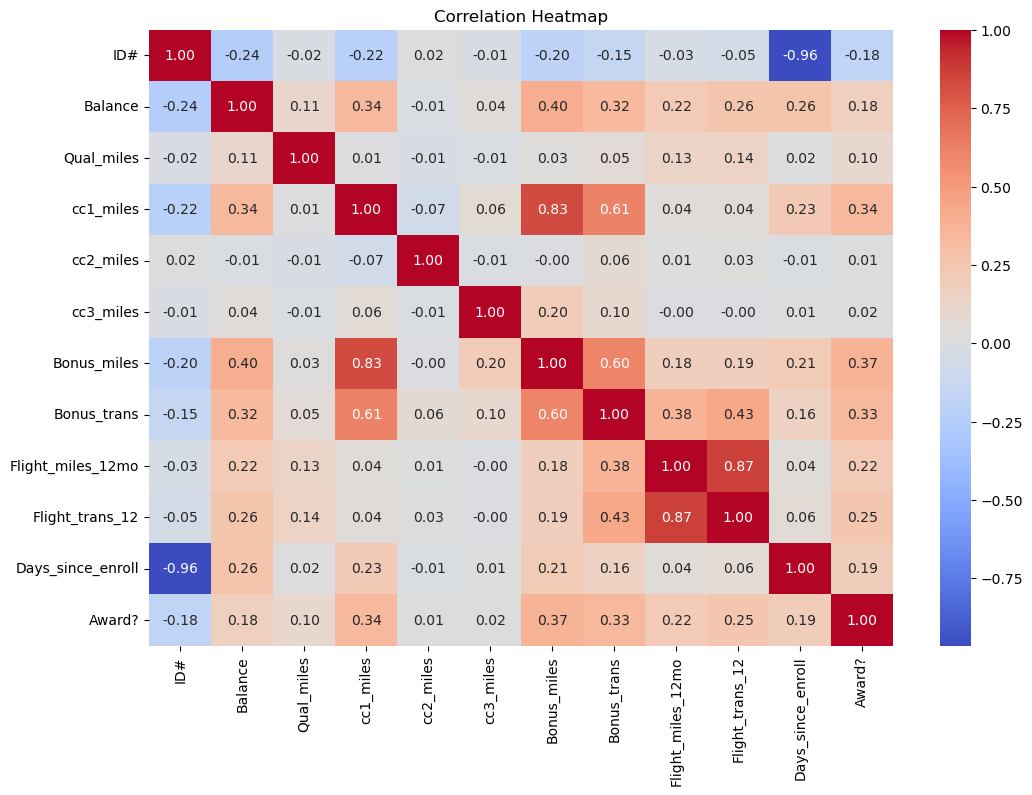

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

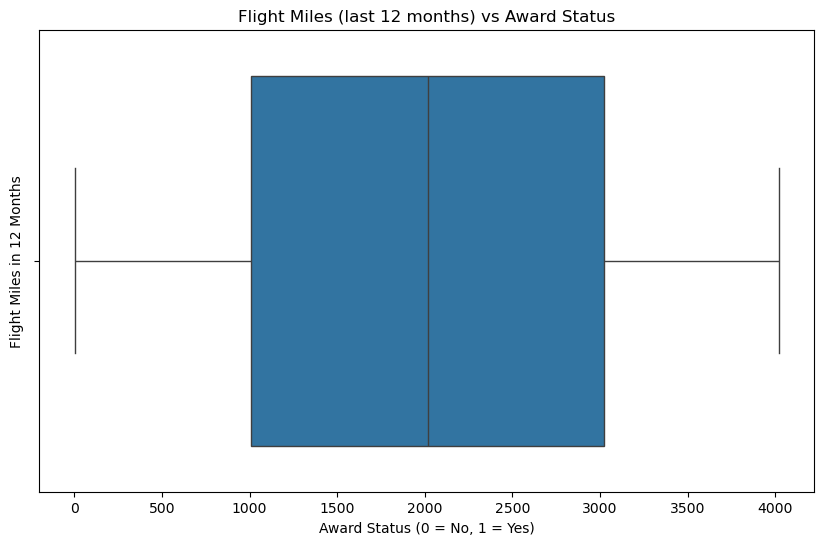

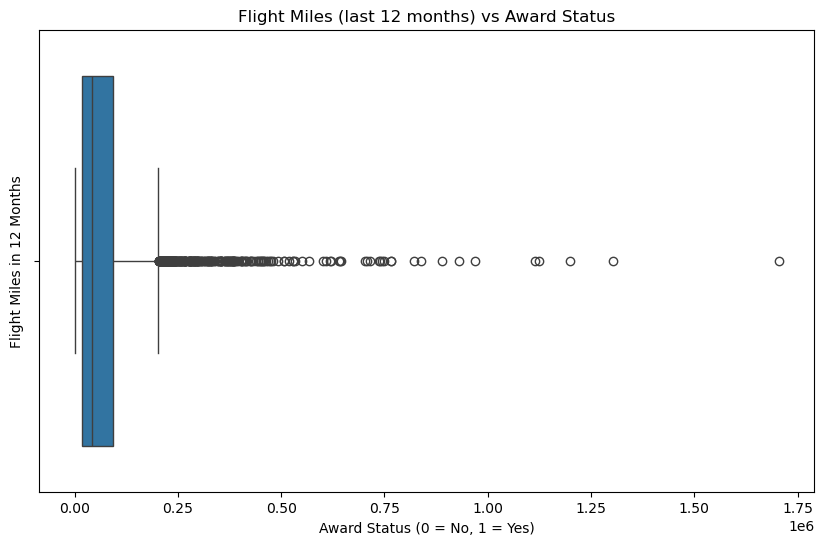

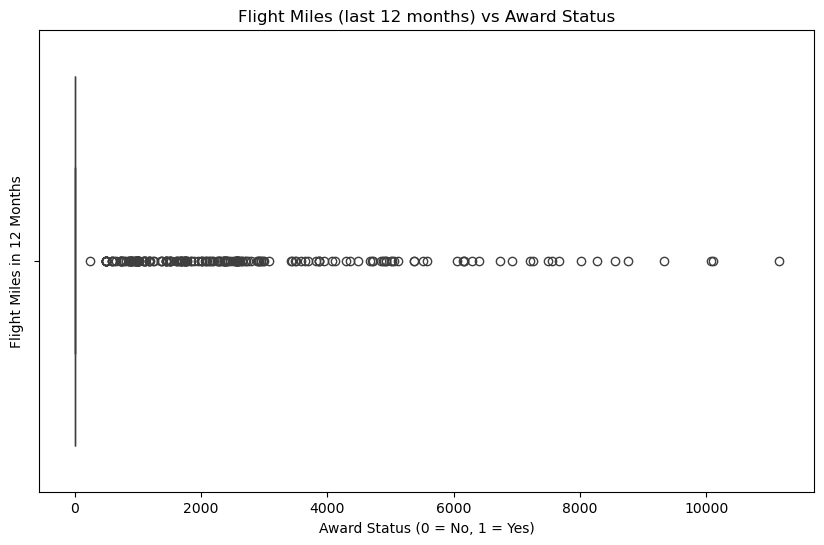

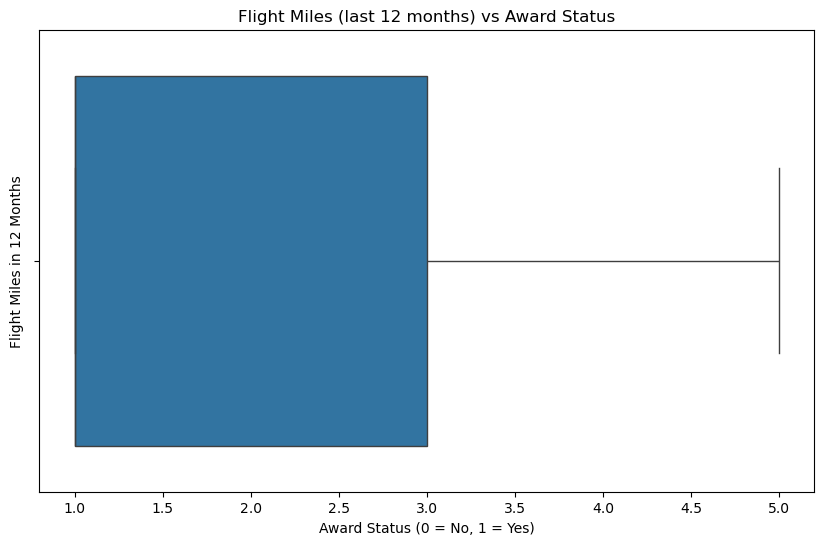

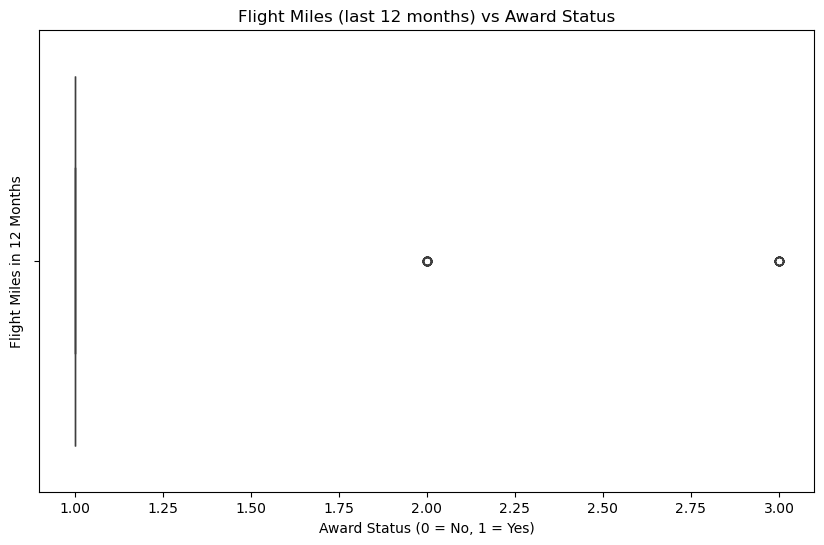

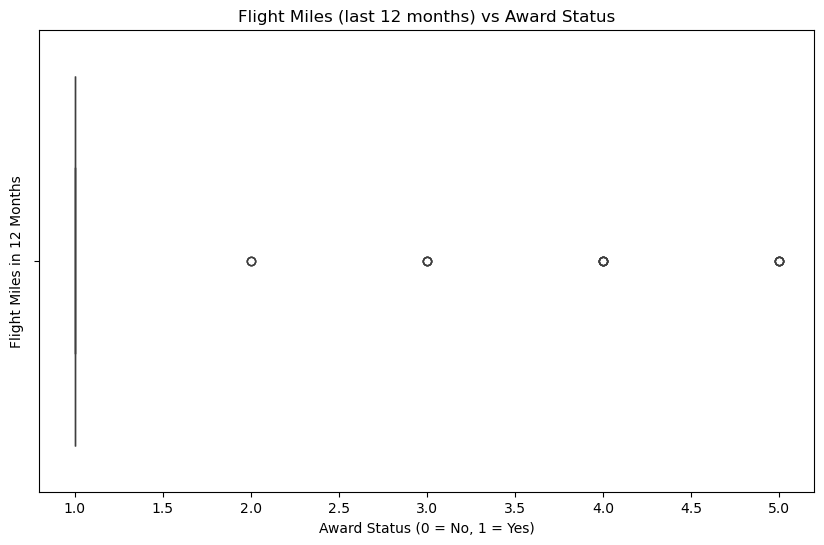

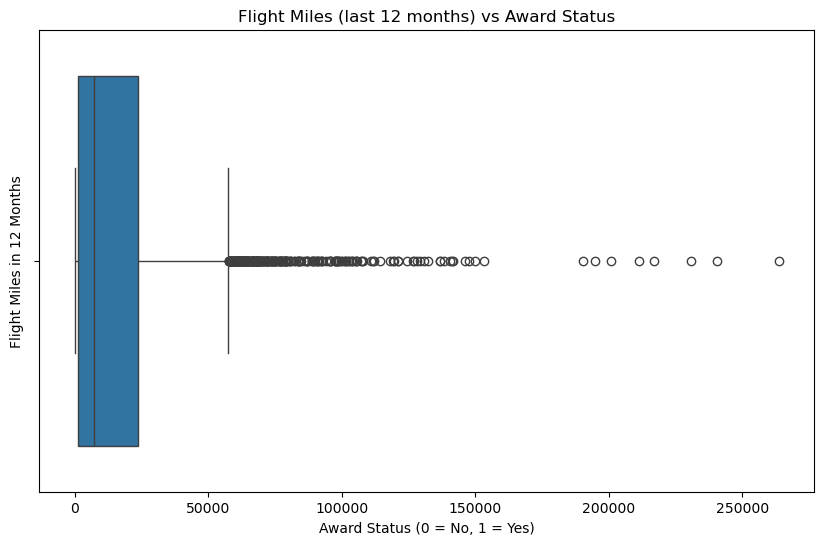

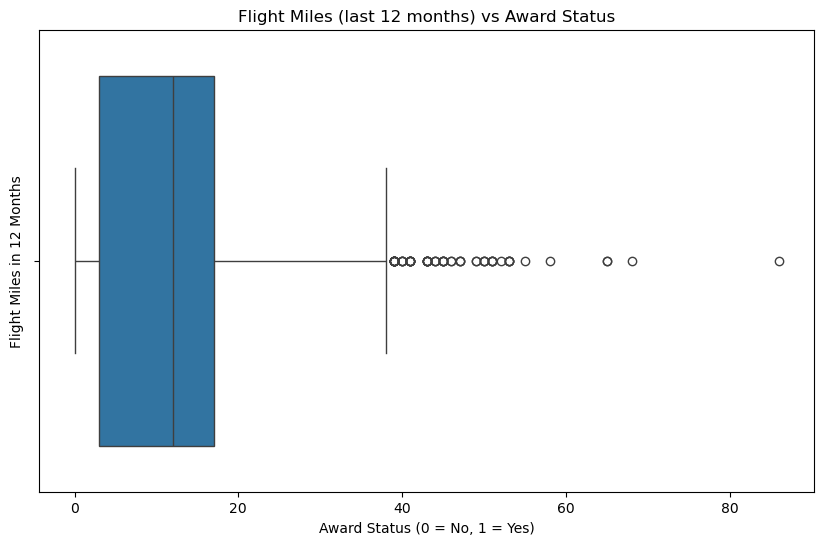

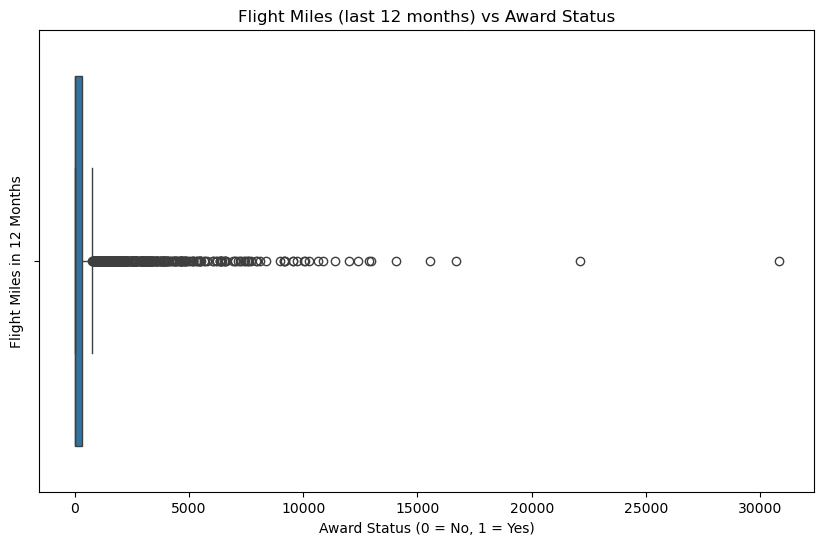

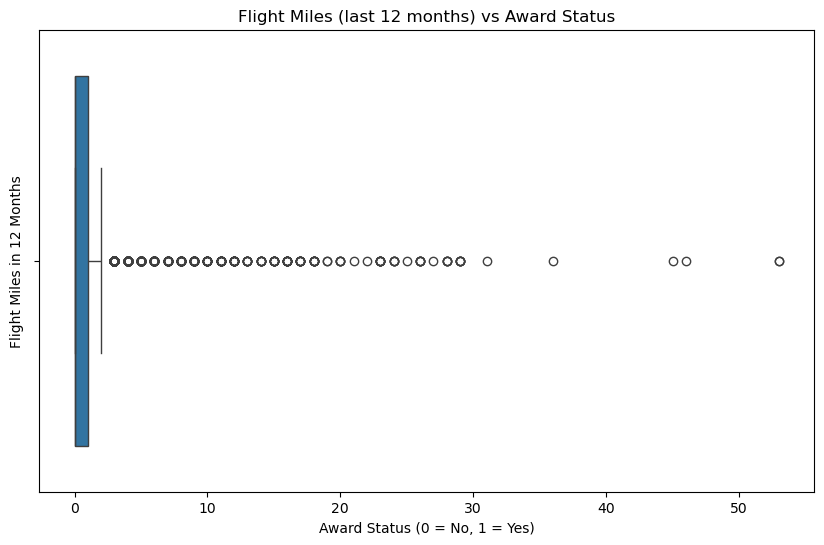

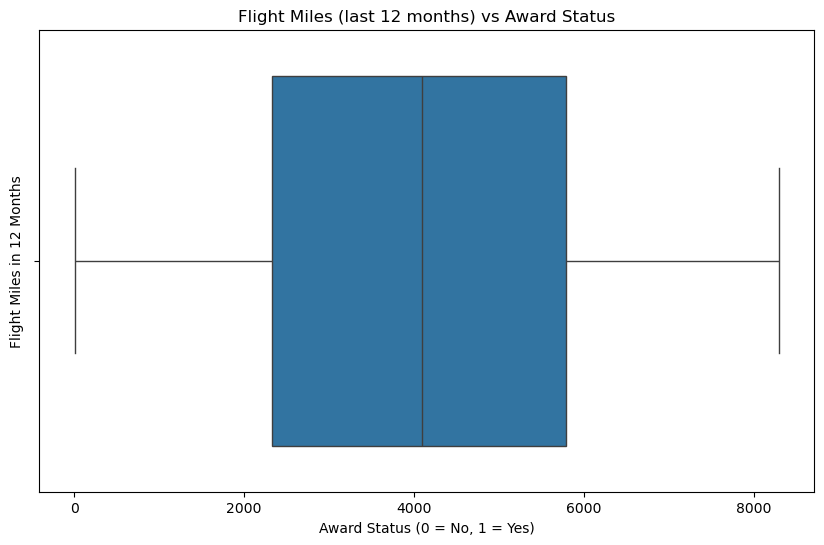

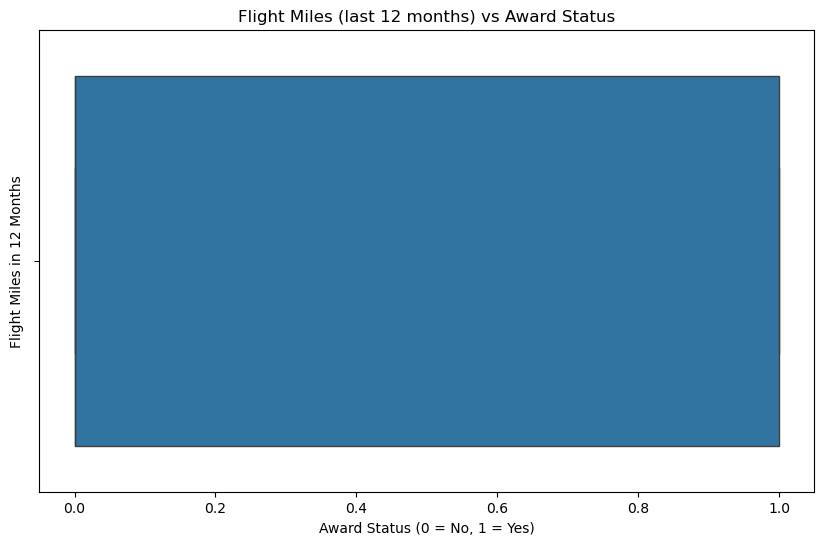

In [59]:
for col in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=col, data=df)
    plt.title('Flight Miles (last 12 months) vs Award Status')
    plt.xlabel('Award Status (0 = No, 1 = Yes)')
    plt.ylabel('Flight Miles in 12 Months')
    plt.show()

In [61]:
# Implementing Clustering Algorithms:

In [62]:
# •	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [64]:
df_cleaned = df.drop(['ID#'], axis=1) if 'ID#' in df.columns else df.copy()

In [ ]:
# •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

In [91]:
# • Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and 
# DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

In [67]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

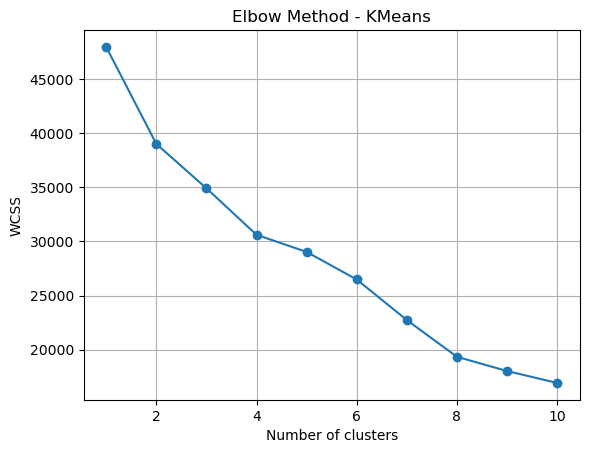

In [69]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [70]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

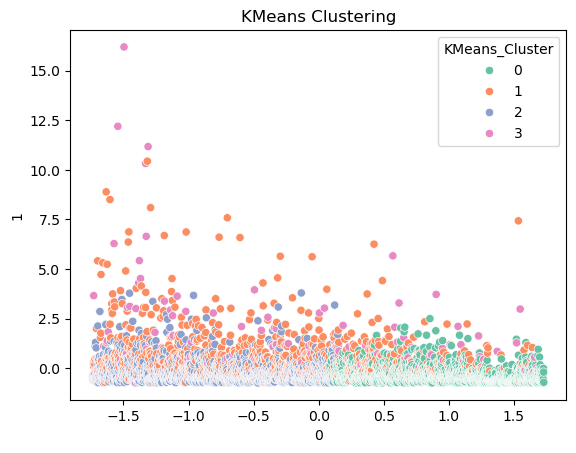

In [74]:
sns.scatterplot(x=df_scaled.iloc[:,0], y=df_scaled.iloc[:,1], hue=df['KMeans_Cluster'], palette='Set2')
plt.title('KMeans Clustering')
plt.show()

In [75]:
linkage_matrix = linkage(df_scaled, method='ward')

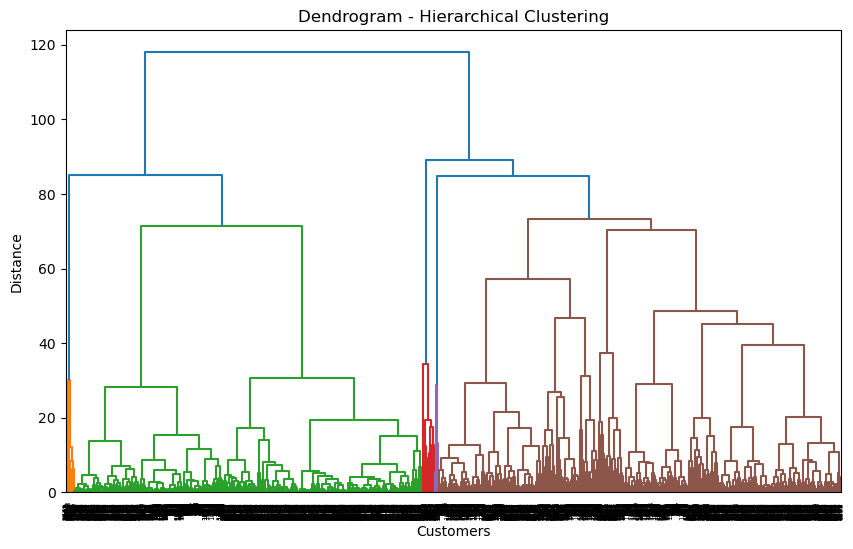

In [76]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [77]:
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

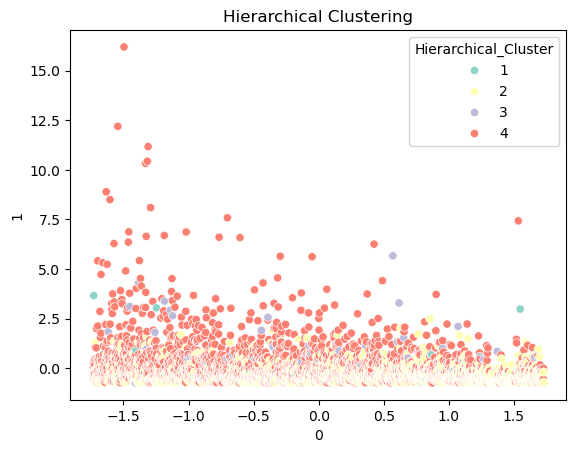

In [78]:
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df['Hierarchical_Cluster'], palette='Set3')
plt.title('Hierarchical Clustering')
plt.show()

In [80]:
dbscan = DBSCAN(eps=1.8, min_samples=5)  # adjust eps as needed
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

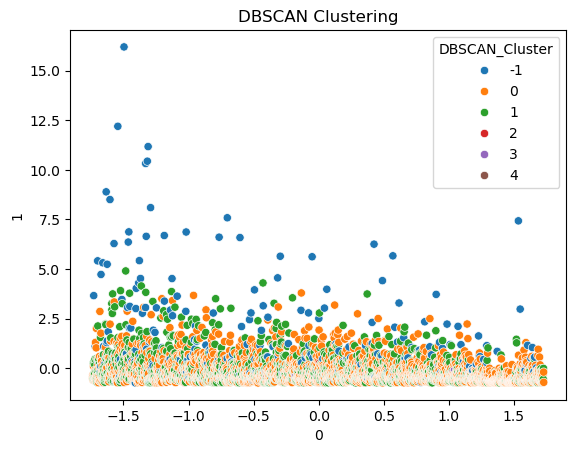

In [81]:
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()

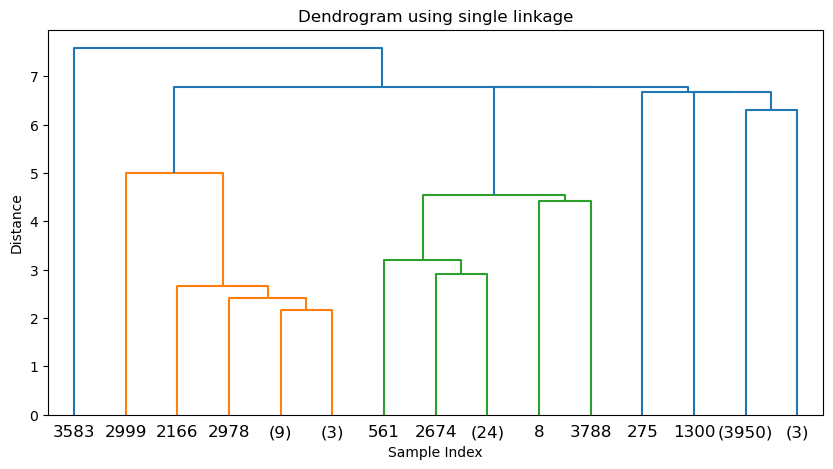

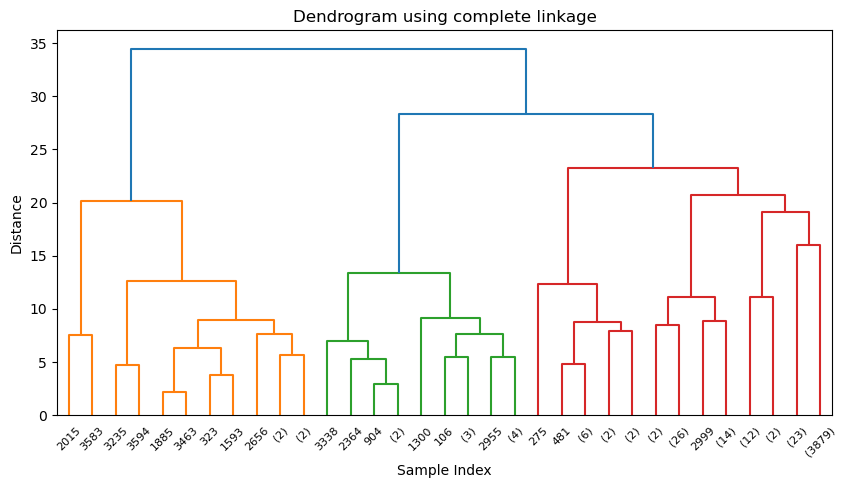

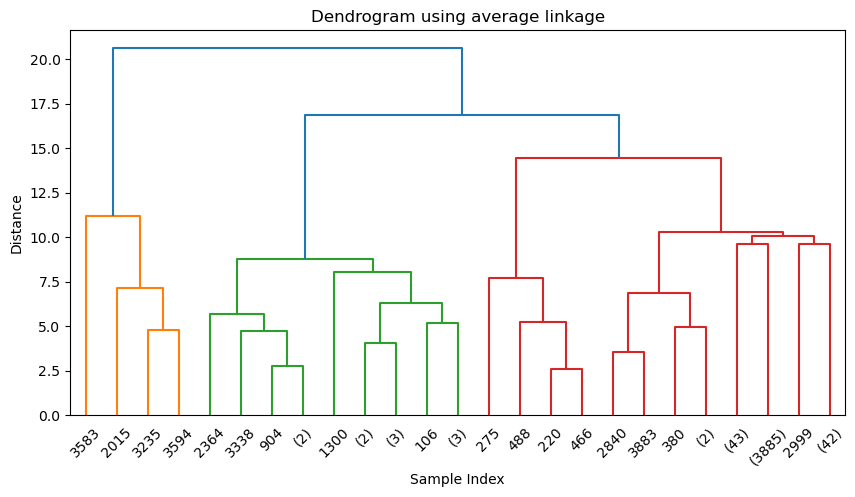

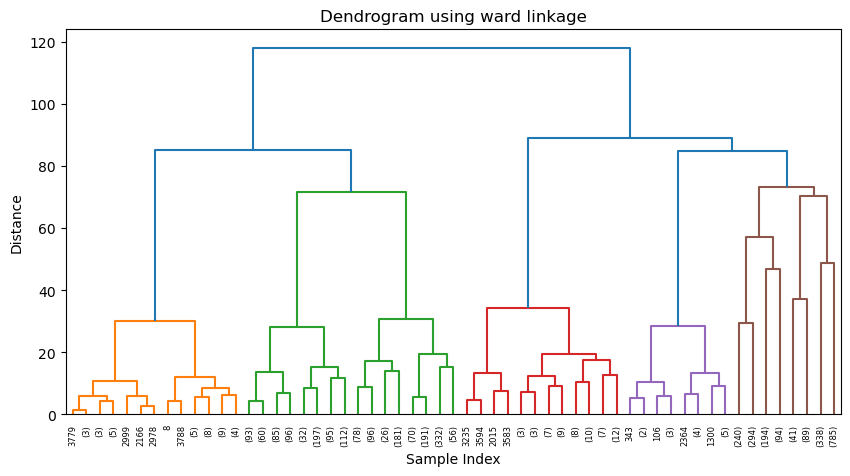

In [83]:
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    plt.figure(figsize=(10, 5))
    Z = linkage(df_scaled, method=method)
    dendrogram(Z, truncate_mode="level", p=5)
    plt.title(f"Dendrogram using {method} linkage")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()


In [84]:
Z = linkage(df_scaled, method='ward')
clusters_hier = fcluster(Z, t=4, criterion='maxclust')  # Try different cluster numbers
df['Hierarchical_Cluster'] = clusters_hier

In [88]:
# Try multiple combinations
from sklearn.metrics import silhouette_score

eps_values = [1.5, 2, 2.5]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(df_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        sil_score = -1
        if n_clusters > 1:
            sil_score = silhouette_score(df_scaled, labels)
        print(f"EPS: {eps}, MinPts: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {sil_score:.3f}")


EPS: 1.5, MinPts: 3, Clusters: 10, Silhouette Score: 0.173
EPS: 1.5, MinPts: 5, Clusters: 5, Silhouette Score: 0.190
EPS: 1.5, MinPts: 10, Clusters: 3, Silhouette Score: 0.207
EPS: 2, MinPts: 3, Clusters: 9, Silhouette Score: 0.210
EPS: 2, MinPts: 5, Clusters: 7, Silhouette Score: 0.211
EPS: 2, MinPts: 10, Clusters: 3, Silhouette Score: 0.220
EPS: 2.5, MinPts: 3, Clusters: 5, Silhouette Score: 0.497
EPS: 2.5, MinPts: 5, Clusters: 3, Silhouette Score: 0.513
EPS: 2.5, MinPts: 10, Clusters: 3, Silhouette Score: 0.515


In [90]:
# Summary of clustering
print(df.groupby('KMeans_Cluster').mean(numeric_only=True))
print(df['DBSCAN_Cluster'].value_counts())

                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               3133.055231   39898.197531  106.287199   1.388564   1.016894   
1               1532.492552  127734.216485  160.202582   3.959285   1.001986   
2               1094.120278   56985.831149   96.370085   1.363917   1.018504   
3               1751.262821  194803.871795  810.397436   2.198718   1.038462   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000   6271.906433     7.831709         201.923977   
1                1.047666  45887.323734    19.507448         371.256207   
2                1.000771   5886.720894     7.996916         227.814187   
3                1.000000  32475.410256    27.737179        5510.717949   

                Flight_trans_12  Days_since_enroll    Award?  \
KMea

In [92]:
# Cluster Analysis and Interpretation:

In [93]:
# •	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

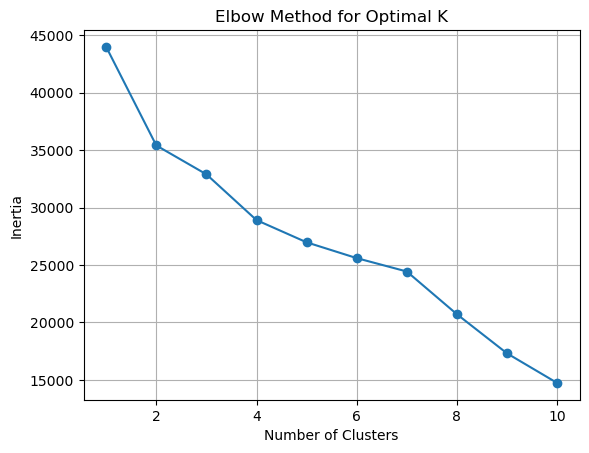

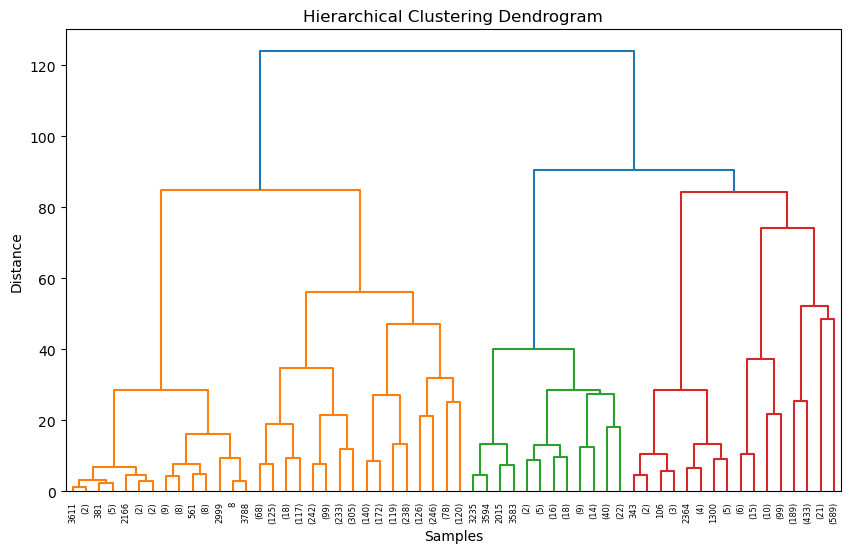

KMeans Cluster Summary:
                         ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1750.333333  193291.147436  795.455128   2.179487   1.038462   
1               1658.865158  122119.899548  151.724887   3.885068   1.002715   
2               1101.367314   59693.586570  112.733010   1.372168   1.031553   
3               3055.842210   36920.458056   96.690413   1.269640   1.006658   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000  32292.288462    27.628205        5530.230769   
1                1.043439  43772.394570    19.398190         366.520362   
2                1.000809   6311.116505     8.456311         258.830097   
3                1.000000   4897.208389     6.790280         167.861518   

                Flight_trans_12  Days_since

In [95]:
# -----------------------------
# 1. K-MEANS CLUSTERING
# -----------------------------
# Find optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Fit KMeans with optimal K (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# -----------------------------
# 2. HIERARCHICAL CLUSTERING
# -----------------------------
# Create linkage matrix
linked = linkage(scaled_data, method='ward')

# Dendrogram to visualize clusters
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Assign clusters from dendrogram (e.g., 4 clusters)
df['Hierarchical_Cluster'] = fcluster(linked, 4, criterion='maxclust')

# -----------------------------
# 3. DBSCAN CLUSTERING
# -----------------------------
dbscan = DBSCAN(eps=2, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# -----------------------------
# ANALYZE CLUSTER CHARACTERISTICS
# -----------------------------
# Mean values by cluster
kmeans_summary = df.groupby('KMeans_Cluster').mean()
hierarchical_summary = df.groupby('Hierarchical_Cluster').mean()
dbscan_summary = df.groupby('DBSCAN_Cluster').mean()

# Display summaries
print("KMeans Cluster Summary:\n", kmeans_summary)
print("\nHierarchical Cluster Summary:\n", hierarchical_summary)
print("\nDBSCAN Cluster Summary:\n", dbscan_summary)

In [96]:
# Visualization:

In [97]:
# Visualize the clustering results using scatter plots or other suitable visualization techniques.

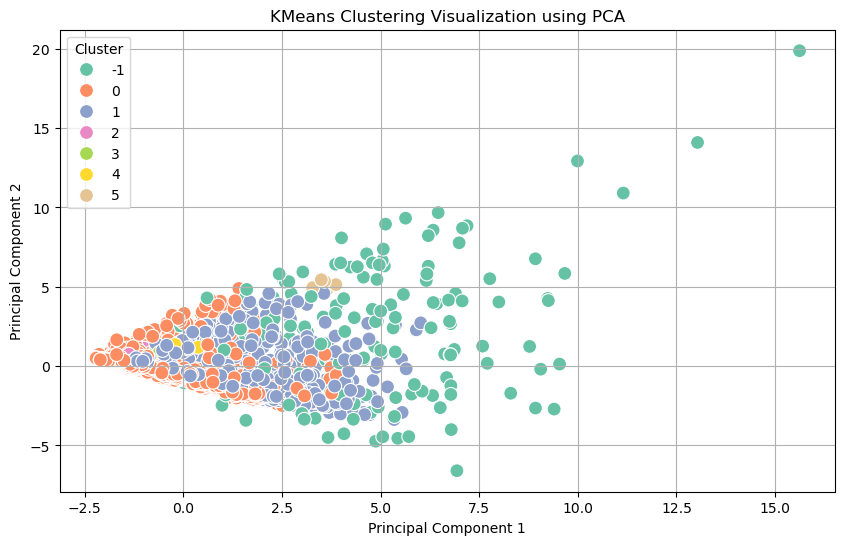

In [105]:
from sklearn.decomposition import PCA

df['Cluster'] = df['DBSCAN_Cluster']

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Add PCA results to DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("KMeans Clustering Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [106]:
# Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

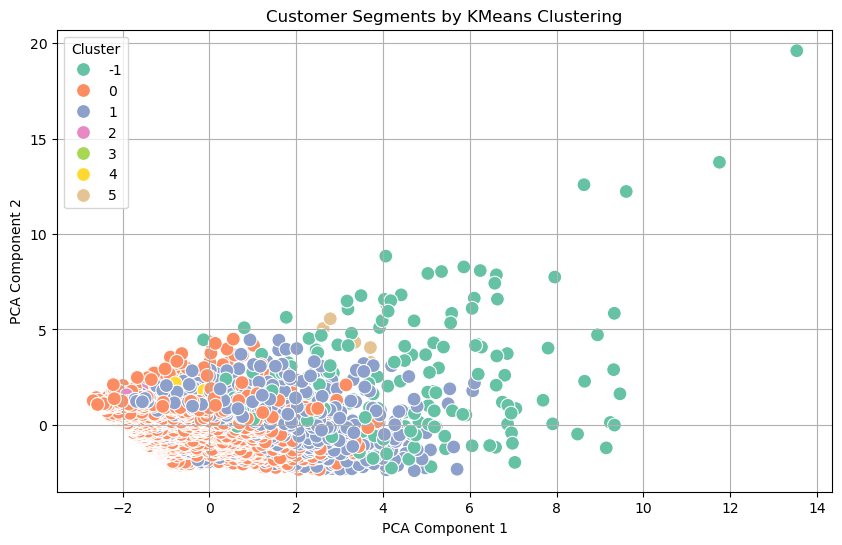

In [107]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df['DBSCAN_Cluster'], palette='Set2', s=100)
plt.title('Customer Segments by KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [108]:
# Evaluation and Performance Metrics:

In [109]:
# Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [112]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Step 2: Load the dataset
df = pd.read_csv("EastWestAirlines.csv")

# Step 3: Preprocess data (drop non-numeric/ID columns if any)
df_clean = df.drop(['ID#'], axis=1) if 'ID#' in df.columns else df.copy()

# Step 4: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Step 5: K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluate Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# Step 6: DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Filter out noise points for silhouette score
dbscan_core_mask = dbscan_labels != -1
if np.unique(dbscan_labels[dbscan_core_mask]).size > 1:
    dbscan_silhouette = silhouette_score(scaled_data[dbscan_core_mask], dbscan_labels[dbscan_core_mask])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
else:
    print("DBSCAN failed to form valid clusters (only one cluster or all noise).")


K-Means Silhouette Score: 0.1907
DBSCAN Silhouette Score: 0.2940
